Problems to solve: <BR>
    Date ranges <BR>
    Multiple stocks <BR>
    Align dates <br>
    Right order <br>
Building a dataframe

In [69]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [36]:
start_date = '2010-01-22'
end_date = '2010-01-26'
dates = pd.date_range(start_date, end_date)
#Create an empty dataframe
df1 = pd.DataFrame(index=dates)
#Read SPY data into temporary datframe
dfSPY = pd.read_csv("data/SPY.csv", index_col='Date', parse_dates=True, usecols=['Date', 'Adj Close'], na_values = ['nan']  )
dfSPY = dfSPY.rename(columns={'Adj Close': 'SPY'})
df1 = df1.join(dfSPY, how="inner")
df1

,SPY
2010-01-22,104.34
2010-01-25,104.87
2010-01-26,104.43


In [37]:
symbols = ['GOOG', 'IBM', 'GLD']
for sym in symbols:
    df_temp = pd.read_csv("data/{}.csv".format(sym), index_col='Date', parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
    df_temp = df_temp.rename(columns={"Adj Close": sym})
    df1 = df1.join(df_temp)

In [38]:
df1

,SPY,GOOG,IBM,GLD
2010-01-22,104.34,550.01,119.61,107.17
2010-01-25,104.87,540.00,120.20,107.48
2010-01-26,104.43,542.42,119.85,107.56


In [40]:
def symbol_to_path(symbol, base_dir="data"):
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

In [61]:
def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files"""
    df = pd.DataFrame(index = dates)
    if 'SPY' not in symbols:
        symbols.insert(0, "SPY")
    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col="Date", parse_dates=True, usecols=["Date", "Adj Close"], na_values=['nan'])
        df_temp = df_temp.rename(columns={"Adj Close": symbol})
        df = df.join(df_temp, how="inner")
        if symbol == "SPY":
            df = df.dropna(subset=["SPY"])
    return df

In [71]:
symbols = ['GOOG', 'IBM', 'GLD']
dates = pd.date_range('2010-01-22', '2012-01-26')


In [72]:
test_df = get_data(symbols, dates)

In [73]:
print(test_df)

               SPY    GOOG     IBM     GLD
2010-01-22  104.34  550.01  119.61  107.17
2010-01-25  104.87  540.00  120.20  107.48
2010-01-26  104.43  542.42  119.85  107.56
2010-01-27  104.93  542.10  120.40  106.53
2010-01-28  103.73  534.29  117.94  106.48
2010-01-29  102.60  529.94  116.65  105.96
2010-02-01  104.19  533.02  118.82  108.35
2010-02-02  105.46  531.12  119.64  109.13
2010-02-03  104.93  540.82  119.76  108.70
2010-02-04  101.69  526.78  117.23  104.37
2010-02-05  101.90  531.29  117.73  104.68
2010-02-08  101.17  533.47  116.68  104.04
2010-02-09  102.44  536.44  117.95  105.41
2010-02-10  102.24  534.45  117.57  105.12
2010-02-11  103.31  536.40  118.45  107.13
2010-02-12  103.22  533.12  118.71  107.04
2010-02-16  104.84  541.30  119.89  109.62
2010-02-17  105.34  538.21  120.94  109.25
2010-02-18  105.96  543.22  122.36  109.98
2010-02-19  106.18  540.76  121.77  109.47
2010-02-22  106.20  542.80  121.44  109.07
2010-02-23  104.91  535.07  121.07  107.89
2010-02-24 

In [78]:
def plot_data(df, title="Stock prices"):
    ax = df.plot(title = title)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()

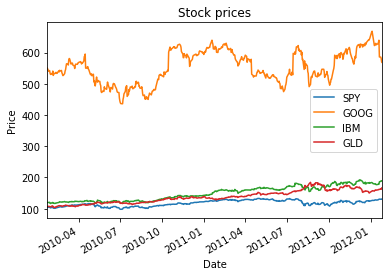

In [79]:
plot_data(test_df)

In [82]:
#Normalize to show movement
def normalize_data(df):
    '''Normalize stock prices using the first row of the dataframe'''
    return df/df.ix[0,:]

C:\Users\Juwon Lee\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


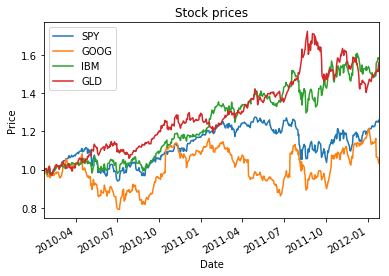

In [83]:
plot_data(normalize_data(test_df))